# Counterfeit_Medicines_Sales_Prediction 

## **TASK**
- To build predictive model for predicting sales figures given other information
   related to counterfeit medicine selling operations.

In [72]:
# Libraries

import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_log_error, mean_absolute_error
from sklearn import metrics

In [23]:
# Igonring The Warnings

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

##  Importing the data

In [8]:
df = pd.read_csv("C:/SAP_Code_Unnati/Project-1/counterfeit_train.csv")
df.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [13]:
df.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since',
       'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
       'Availability_rating', 'Area_Type', 'Area_City_Type', 'Area_dist_level',
       'Counterfeit_Sales'],
      dtype='object')

In [14]:
df.describe

<bound method NDFrame.describe of      Medicine_ID  Counterfeit_Weight DistArea_ID  Active_Since  Medicine_MRP   
0          RRA15              13.100     Area046          1995      160.2366  \
1          YVV26                 NaN     Area027          1983      110.4384   
2          LJC15               9.025     Area046          1995      259.4092   
3          GWC40              11.800     Area046          1995       99.9830   
4          QMN13                 NaN     Area019          1983       56.4402   
...          ...                 ...         ...           ...           ...   
6813       OYN80               8.535     Area046          1995      204.1452   
6814       ACW12              20.650     Area046          1995      235.1088   
6815       OPM10              20.000     Area017          2005      193.6292   
6816       SLY12              10.180     Area045          2000      162.8682   
6817       ATT10               7.930     Area018          2007      177.5500   

     

##  Making a Backup of dataFrame

In [15]:
df_bkp = df.copy

In [18]:
df.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [19]:
df.isna().sum()

Medicine_ID               0
Counterfeit_Weight     1166
DistArea_ID               0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales         0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          6818 non-null   object 
 1   Counterfeit_Weight   5652 non-null   float64
 2   DistArea_ID          6818 non-null   object 
 3   Active_Since         6818 non-null   int64  
 4   Medicine_MRP         6818 non-null   float64
 5   Medicine_Type        6818 non-null   object 
 6   SidEffect_Level      6818 non-null   object 
 7   Availability_rating  6818 non-null   float64
 8   Area_Type            6818 non-null   object 
 9   Area_City_Type       6818 non-null   object 
 10  Area_dist_level      6818 non-null   object 
 11  Counterfeit_Sales    6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


In [25]:
df.describe(include="all")

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
count,6818,5652.000000,6818,6818.000000,6818.000000,6818,6818,6818.000000,6818,6818,6818,6818.000000
unique,1557,NaN,10,NaN,NaN,16,2,NaN,4,3,4,NaN
top,RQS74,NaN,Area017,NaN,NaN,Hreplacements,mild,NaN,DownTown,Tier 3,Medium,NaN
freq,9,NaN,760,NaN,NaN,976,4434,NaN,4481,2655,2203,NaN
mean,NaN,14.115057,NaN,1995.836316,151.401518,NaN,NaN,0.079174,NaN,NaN,NaN,2280.583480
std,NaN,4.649668,NaN,8.368979,62.203961,NaN,NaN,0.051481,NaN,NaN,NaN,1693.354404
min,NaN,5.855000,NaN,1983.000000,41.790000,NaN,NaN,0.013000,NaN,NaN,NaN,146.290000
25%,NaN,9.995000,NaN,1985.000000,104.509400,NaN,NaN,0.040058,NaN,NaN,NaN,933.265600
50%,NaN,13.800000,NaN,1997.000000,153.195700,NaN,NaN,0.066955,NaN,NaN,NaN,1902.670400
75%,NaN,18.050000,NaN,2002.000000,196.148350,NaN,NaN,0.107697,NaN,NaN,NaN,3207.638400


In [26]:
df.shape

(6818, 12)

#  Data Visualization

## Converting Strings Into Categories 

In [28]:
pd.api.types.is_string_dtype(df["Area_Type"])

True

In [30]:
# Find the columns which contains strings and convert them into category.
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Medicine_ID          6818 non-null   category
 1   Counterfeit_Weight   5652 non-null   float64 
 2   DistArea_ID          6818 non-null   category
 3   Active_Since         6818 non-null   int64   
 4   Medicine_MRP         6818 non-null   float64 
 5   Medicine_Type        6818 non-null   category
 6   SidEffect_Level      6818 non-null   category
 7   Availability_rating  6818 non-null   float64 
 8   Area_Type            6818 non-null   category
 9   Area_City_Type       6818 non-null   category
 10  Area_dist_level      6818 non-null   category
 11  Counterfeit_Sales    6818 non-null   float64 
dtypes: category(7), float64(4), int64(1)
memory usage: 365.9 KB


### Machine Learning Models can not work on categorical variables in the form of strings, so we need to change it into numerical form. This can be done by making new features according to the categories by assigning it values

In [32]:
# Check missing data.
df.isnull().sum()/len(df)

Medicine_ID            0.000000
Counterfeit_Weight     0.171018
DistArea_ID            0.000000
Active_Since           0.000000
Medicine_MRP           0.000000
Medicine_Type          0.000000
SidEffect_Level        0.000000
Availability_rating    0.000000
Area_Type              0.000000
Area_City_Type         0.000000
Area_dist_level        0.000000
Counterfeit_Sales      0.000000
dtype: float64

## Missing Value Imputation

## 1. Fill numerical Missing Values

In [33]:
# Check for which numeric columns have null values.
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Counterfeit_Weight


In [35]:
# Fill the numeric rows with median.
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells is if the data was missing or not.
            df[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median.
            df[label] = content.fillna(content.median())

In [36]:
df.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,Counterfeit_Weight_is_missing
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026,False
1,YVV26,13.800,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520,True
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920,False
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130,False
4,QMN13,13.800,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402,True


In [38]:
df.isna().sum().sum()

0

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Medicine_ID                    6818 non-null   category
 1   Counterfeit_Weight             6818 non-null   float64 
 2   DistArea_ID                    6818 non-null   category
 3   Active_Since                   6818 non-null   int64   
 4   Medicine_MRP                   6818 non-null   float64 
 5   Medicine_Type                  6818 non-null   category
 6   SidEffect_Level                6818 non-null   category
 7   Availability_rating            6818 non-null   float64 
 8   Area_Type                      6818 non-null   category
 9   Area_City_Type                 6818 non-null   category
 10  Area_dist_level                6818 non-null   category
 11  Counterfeit_Sales              6818 non-null   float64 
 12  Counterfeit_Weight_is_missing  681

#  We are using `median` instead of mean bcause median is more robust to outliers than mean. The elements of the dataset will not affect the median of the dataset but it will to the mean.

In [40]:
# Check if there is any numerical missing value.
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

##  Filling and turning Categorical variables into numbers 

In [41]:
# Check for columns which aren't numeric.
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Medicine_ID
DistArea_ID
Medicine_Type
SidEffect_Level
Area_Type
Area_City_Type
Area_dist_level


In [43]:
# Check for the categorical missing values and impute it.
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
         # Add a binary column to indicate whether sample had missing value.
            df[label+"_is_missing"] = pd.isnull(content)
        # Turn categorical data into numerical data and add +1 (To null aout any negative value FOR e.g : if there is -1 then +1 will make it +ve by summing it to 0.)
            df[label] = pd.Categorical(content).codes + 1 


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Medicine_ID                    6818 non-null   int16  
 1   Counterfeit_Weight             6818 non-null   float64
 2   DistArea_ID                    6818 non-null   int8   
 3   Active_Since                   6818 non-null   int64  
 4   Medicine_MRP                   6818 non-null   float64
 5   Medicine_Type                  6818 non-null   int8   
 6   SidEffect_Level                6818 non-null   int8   
 7   Availability_rating            6818 non-null   float64
 8   Area_Type                      6818 non-null   int8   
 9   Area_City_Type                 6818 non-null   int8   
 10  Area_dist_level                6818 non-null   int8   
 11  Counterfeit_Sales              6818 non-null   float64
 12  Counterfeit_Weight_is_missing  6818 non-null   b

In [45]:
df.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,Counterfeit_Weight_is_missing,Medicine_ID_is_missing,DistArea_ID_is_missing,Medicine_Type_is_missing,SidEffect_Level_is_missing,Area_Type_is_missing,Area_City_Type_is_missing,Area_dist_level_is_missing
0,1068,13.100,9,1995,160.2366,5,1,0.070422,2,1,3,1775.5026,False,False,False,False,False,False,False,False
1,1498,13.800,6,1983,110.4384,11,2,0.013000,1,3,2,3069.1520,True,False,False,False,False,False,False,False
2,692,9.025,9,1995,259.4092,9,2,0.060783,2,1,3,2603.0920,False,False,False,False,False,False,False,False
3,406,11.800,9,1995,99.9830,13,2,0.065555,2,1,3,1101.7130,False,False,False,False,False,False,False,False
4,995,13.800,5,1983,56.4402,10,1,0.248859,4,1,3,158.9402,True,False,False,False,False,False,False,False


In [47]:
# Checking after missing value imputation. 
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

# It must return nothing.

## Checking the outliers

<Axes: xlabel='Counterfeit_Sales'>

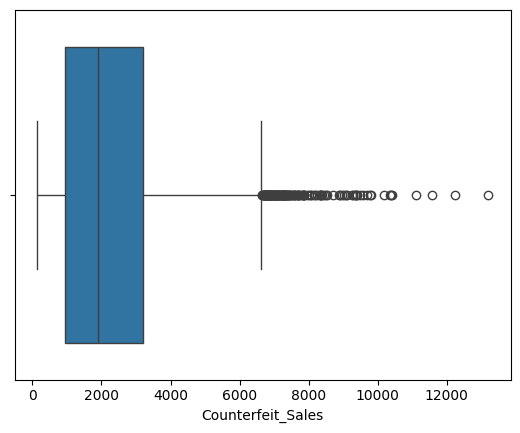

In [49]:
sns.boxplot(x='Counterfeit_Sales', data=df)

#  Splitting The Data Into Training and Testing Dataset

In [50]:
df_train,df_test = train_test_split(df, test_size = 0.3, random_state=42)

In [51]:
df_train.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,Counterfeit_Weight_is_missing,Medicine_ID_is_missing,DistArea_ID_is_missing,Medicine_Type_is_missing,SidEffect_Level_is_missing,Area_Type_is_missing,Area_City_Type_is_missing,Area_dist_level_is_missing
5632,1363,15.400,1,1996,209.1084,10,2,0.124937,4,3,4,1105.0420,False,False,False,False,False,False,False,False
903,760,12.800,7,2002,119.8254,10,1,0.050563,2,2,3,1740.8810,False,False,False,False,False,False,False,False
2666,708,20.150,10,1997,204.2136,7,2,0.180844,2,1,2,3223.6176,False,False,False,False,False,False,False,False
109,744,9.155,7,2002,47.3848,11,1,0.174517,2,2,3,560.4176,False,False,False,False,False,False,False,False
5316,837,13.100,7,2002,127.5492,16,2,0.021560,2,2,3,2545.8332,False,False,False,False,False,False,False,False


In [54]:
y_train = np.log(df_train.Counterfeit_Sales)
X_train = df_train.drop("Counterfeit_Sales",axis=1)

y_test= np.log(df_test.Counterfeit_Sales)
X_test = df_test.drop("Counterfeit_Sales",axis=1)

In [55]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4772, 19), (4772,), (2046, 19), (2046,))

# Building and Evaluating Function 


Metrics used for evaluation:

***Root Mean Squared Logarithmic Error:*** It is calculated by applying log to the actual and the predicted values and then taking their differences. RMSLE is robust to outliers where the small and the large errors are treated evenly.

***Mean Absolute Error:*** The magnitude of the difference between the individual measurement and the true value of the quantity is called the absolute error of the measurement. The arithmetic mean of all the absolute error is taken as the mean absolute error of the value of the physical quantity


In [69]:
def rmsle(y_test, y_preds):
    """
    Calcualates root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create a functin to evaluate model on a few  different levels. 
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
# If our model perform well on the above validation dataset then it means our model is overfitting.
    
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Test MAE": mean_absolute_error(y_test, val_preds),
              "Training RSMLE": mean_squared_log_error(y_train, train_preds),
              "Valid RSMLE": rmsle(y_test, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_test, val_preds) 
             }
    return scores

# Model Building

In [70]:
model = linear_model.LinearRegression(n_jobs=-1)
model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [71]:
show_scores(model)

{'Training MAE': 0.3705186791900568,
 'Test MAE': 0.37507662716622187,
 'Training RSMLE': 0.0033206282589901136,
 'Valid RSMLE': 0.058565819545394894,
 'Training R^2': 0.7018513475086889,
 'Valid R^2': 0.7126464354609781}

#  Model Building Using RandomForest

In [65]:
# from sklearn.ensemble import RandomForestRegressor
# reg = RandomForestRegressor(n_jobs=-1,
#                               random_state=42,
#                               max_samples=4000)
# reg.fit(X_train,y_train)

RandomForestRegressor(max_samples=4000, n_jobs=-1, random_state=42)

In [66]:
# show_scores(reg)

{'Training MAE': 0.1638936825671227,
 'Valid MAE': 0.37963102556423095,
 'Training RSMLE': 0.0006723017545429215,
 'Valid RSMLE': 0.05935621635880408,
 'Training R^2': 0.9405595978425566,
 'Valid R^2': 0.6999748415350125}

# Making Predictions On Test Dataset 

In [ ]:
# Import the test data
df_test = pd.read_csv("", low_memory=False)

df_test.head()

# The low_memory option is a boolean parameter 
#that controls whether Pandas should read the CSV file in chunks or load the entire file into memory at once

In [ ]:
df_test.isna().sum()

In [ ]:
df_test.info()

## Preprocessing the test dataset before making a prediction.

In [ ]:
test_preds = preprocess_data(df_test)

In [ ]:
# Identifying the missing column.
set(X_train.columns) - set(df_test.columns)

In [ ]:
# SAMPLE 

# In our case the missing column is--> 'auctioneerID_is_missing'
# Adjusting Manually.
# df_test["auctioneerID_is_missing"] = False
# df_test.head()



# To maintain the same order of the test dataset as of the training dataset. 

In [ ]:
df_test.columns=X_train.columns

In [ ]:
# Another option to do the same thing.
# df_test = df_test.reindex(columns=X_train.columns)

# Making a Prediction 

In [ ]:
# Make predictions on the test dataset.
test_preds = reg.predict(df_test)

In [ ]:
# Export the model to csv.
df_preds.to_csv("", index=False)

# Feature Importance 

In [ ]:
ideal_model.feature_importances_

In [76]:
# Helper fucntion for plotting feature importance.
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values('feature_importances', ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_xlabel("Features")
    ax.set_ylabel("Features Importance")
    ax.invert_yaxis()



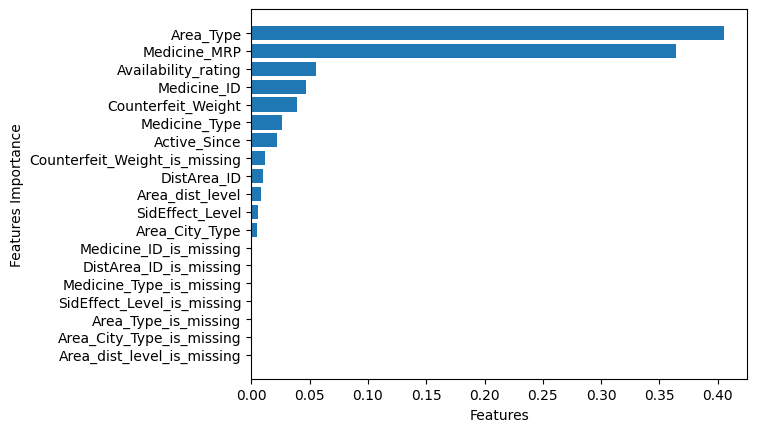

In [77]:
plot_features(X_train.columns, reg.feature_importances_)